In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\heart.csv")

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.info()
# no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# identifying unique values
dict = {
    "columns": df.columns,
    "unique_values": [df[i].nunique() for i in df.columns]
}

In [7]:
df_unique = pd.DataFrame(dict)
df_unique

,columns,unique_values
0,Age,50
1,Sex,2
2,ChestPainType,4
3,RestingBP,67
4,Cholesterol,222
5,FastingBS,2
6,RestingECG,3
7,MaxHR,119
8,ExerciseAngina,2
9,Oldpeak,53


In [8]:
# numerical columns
numnames = []
for i in df.columns:
    if df[i].nunique() > 4:
        numnames.append(i)

numnames

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Outliers

Age


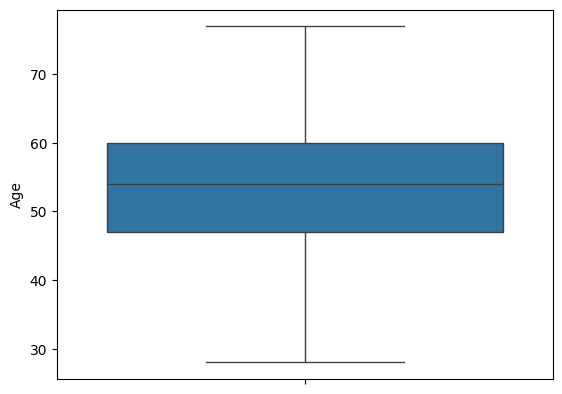

RestingBP


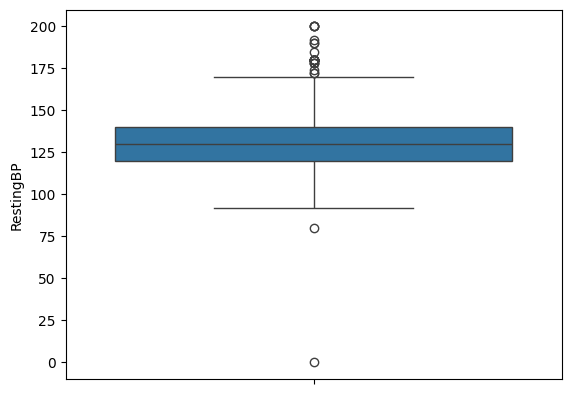

Cholesterol


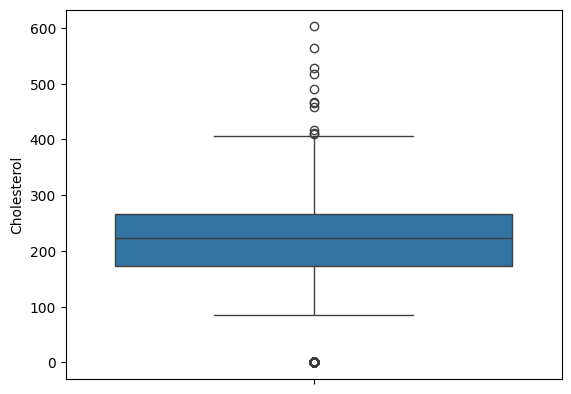

MaxHR


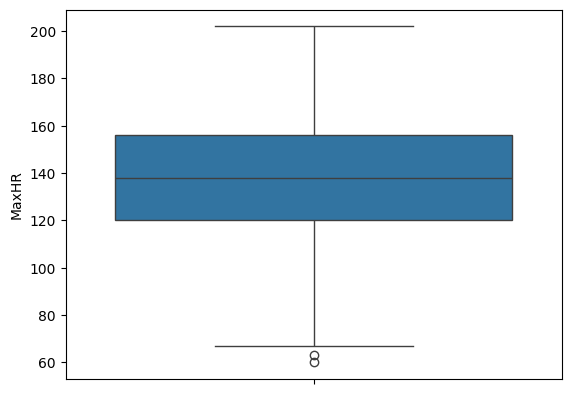

Oldpeak


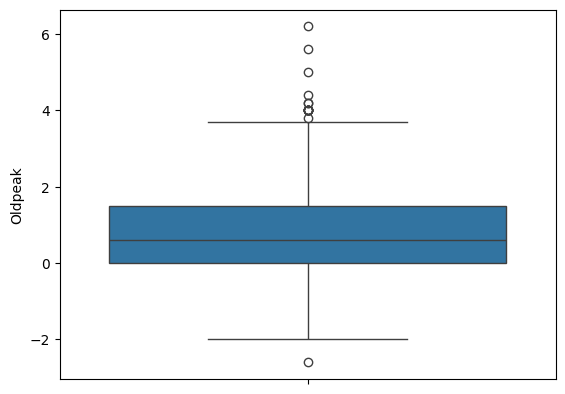

In [9]:
for i in numnames:
    print(i)
    sns.boxplot(df[i])
    plt.show()

In [10]:
numerical_df = df[numnames]
numerical_df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0
...,...,...,...,...,...
913,45,110,264,132,1.2
914,68,144,193,141,3.4
915,57,130,131,115,1.2
916,57,130,236,174,0.0


In [11]:
def detect_outliers(df,feature):
    q25,q75 = np.percentile(df[feature],[25,75])
    iqr = q75 - q25
    q0 = q25 - 1.5*iqr
    q100 = q75 + 1.5*iqr
    df1 = df[(df[feature]<=q100) & (df[feature]>=q0)]
    return df1

In [12]:
df2 = df.copy()
for i in numnames:
    df2 = detect_outliers(df2,i)

In [13]:
df2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [14]:
# df1 = detect_outliers(df,"MaxHR")
# df1

In [15]:
# df2 = detect_outliers(df1,"Oldpeak")
# df2

In [16]:
# df3 = detect_outliers(df2,"RestingBP")
# df3

In [17]:
# df4 = detect_outliers(df3,"Cholesterol")
# df4

Age


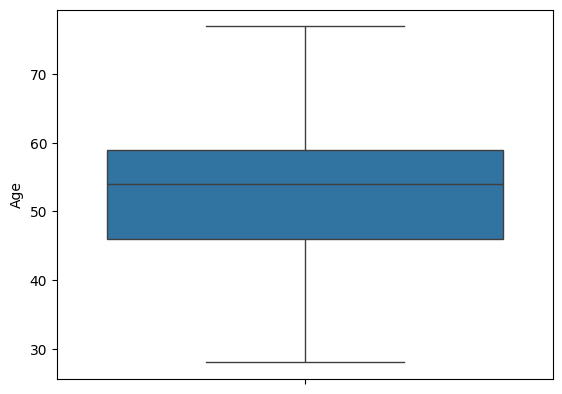

RestingBP


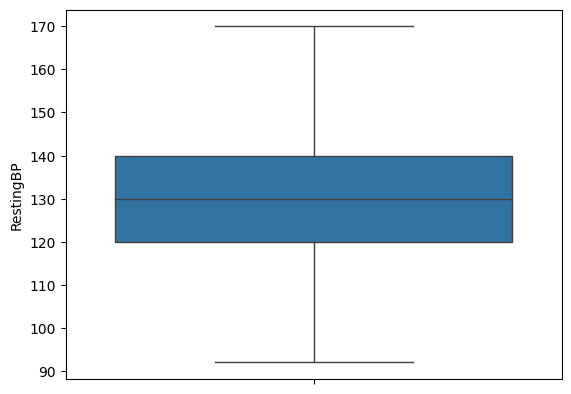

Cholesterol


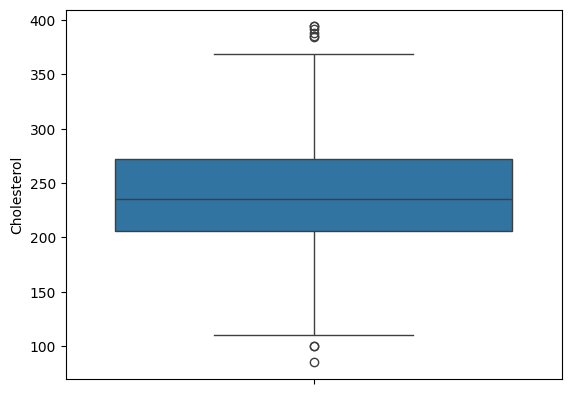

MaxHR


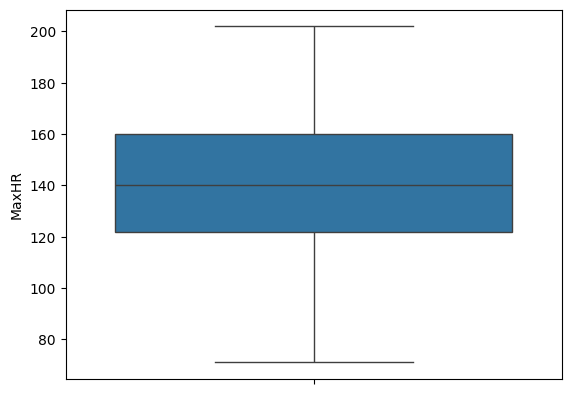

Oldpeak


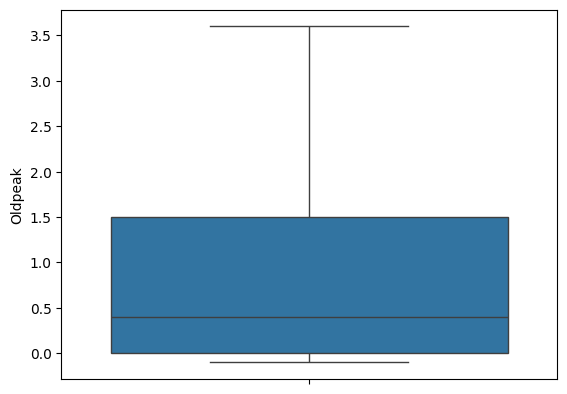

In [18]:
for i in numnames:
    print(i)
    sns.boxplot(df2[i])
    plt.show()

-0.07460126994119586


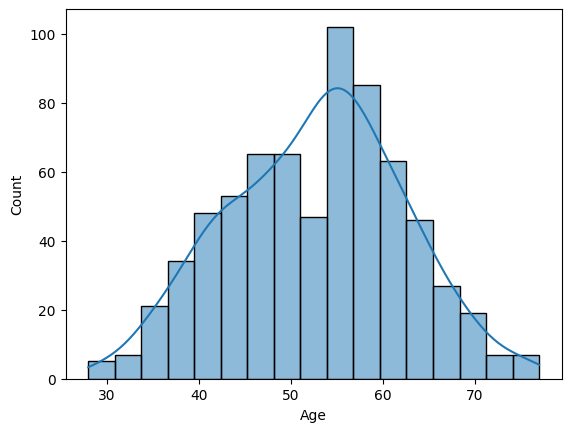

0.19870943798768895


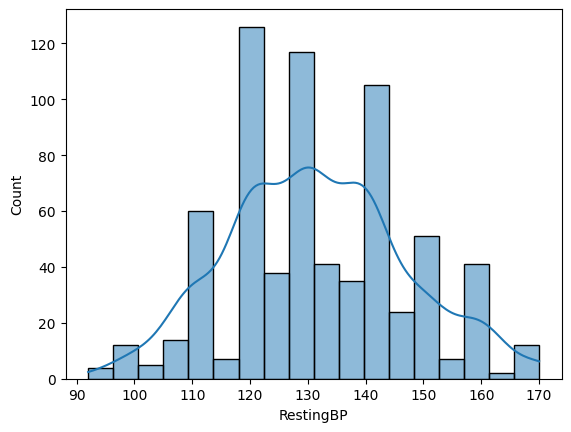

0.2370365927082796


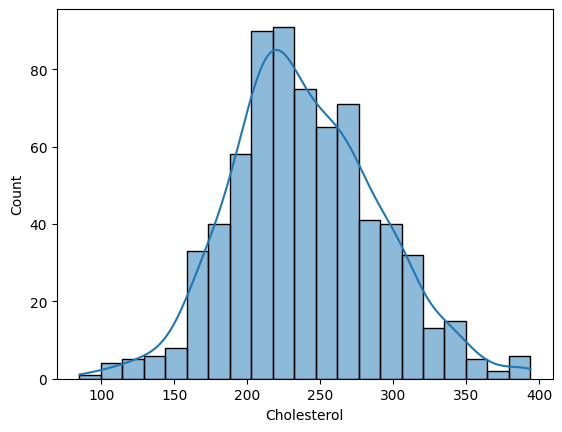

-0.1462553777666316


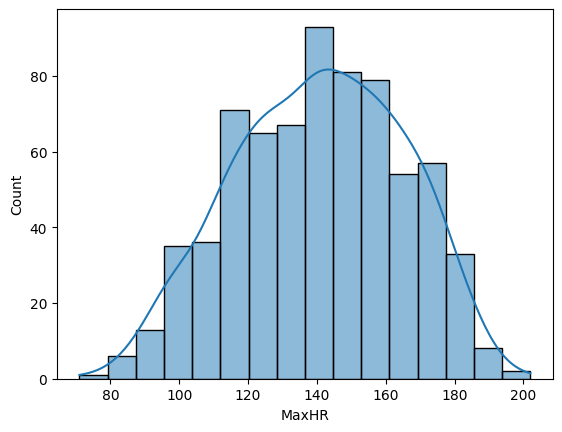

0.8853798451827974


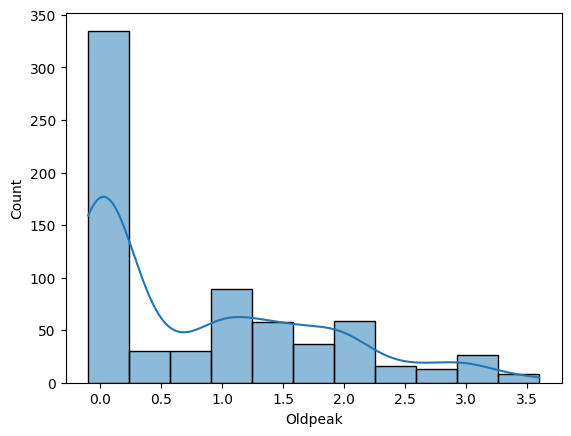

In [19]:
from scipy.stats import skew
for i in numnames:
    print(skew(df2[i]))
    sns.histplot(df2[i],kde=True)
    plt.show()

In [20]:
df2["Oldpeak"] = np.sqrt(df2["Oldpeak"])
df2[df2["Oldpeak"].isna()].index

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Int64Index([512], dtype='int64')

In [21]:
df2.drop(512,inplace=True)

In [22]:
df2.shape

(700, 12)

-0.07386131729270781


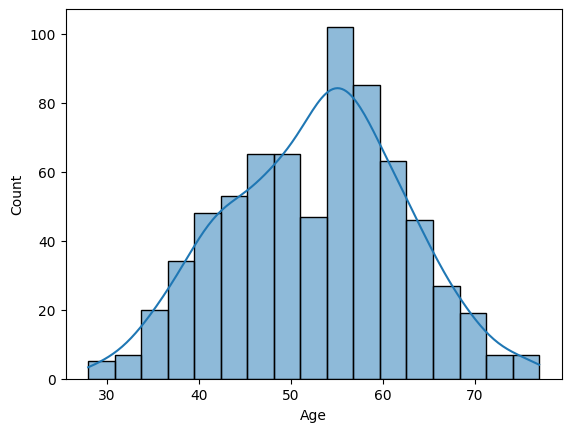

0.19656712011757238


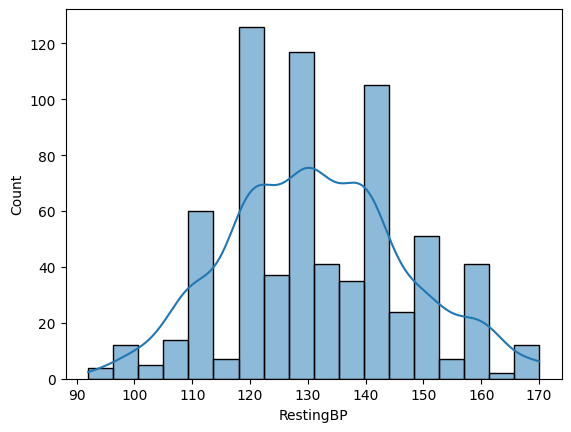

0.23685621437032972


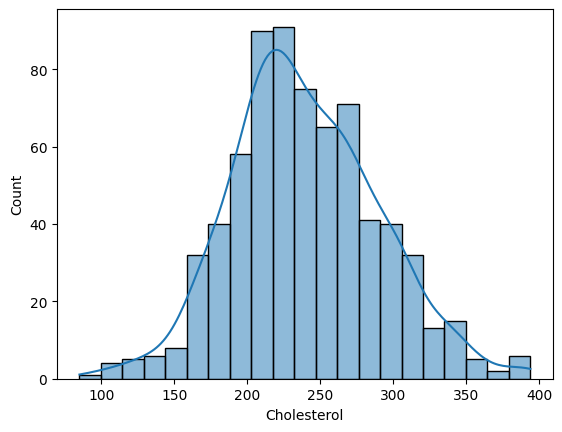

-0.1442363938201554


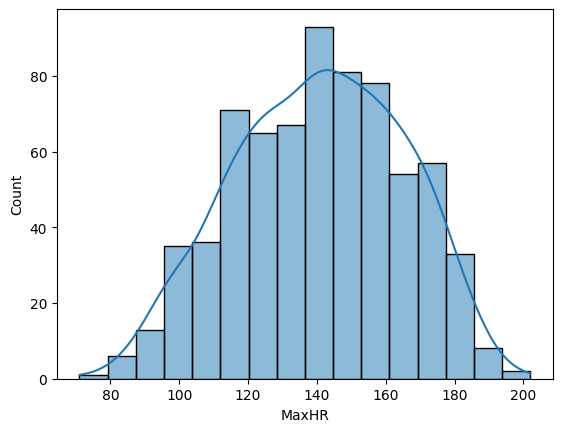

0.22637403720910523


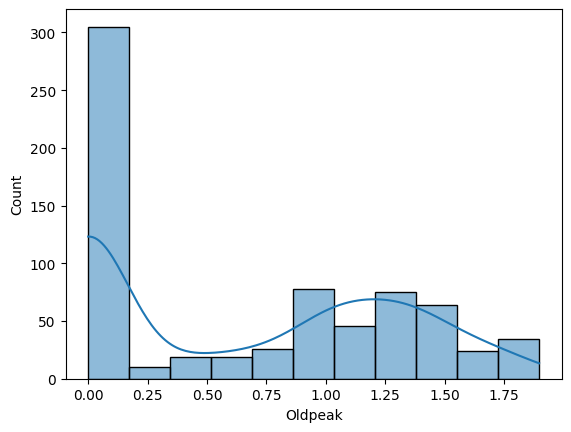

In [23]:
from scipy.stats import skew
for i in numnames:
    print(skew(df2[i]))
    sns.histplot(df2[i],kde=True)
    plt.show()

In [24]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# df4 = df2.copy()
# for i in df4.columns:
#     df4[i] = encoder.fit_transform(df2)

In [25]:
# encoding
df3 = pd.get_dummies(df2,drop_first=True)
df3

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.000000,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.000000,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.000000,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.224745,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.000000,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.095445,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,1.843909,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.095445,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.000000,1,0,1,0,0,0,0,0,1,0


In [26]:
X = df3.drop(["HeartDisease"],axis=1)
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.000000,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.000000,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.000000,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.224745,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.000000,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.095445,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,1.843909,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.095445,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.000000,0,1,0,0,0,0,0,1,0


In [27]:
y = df3["HeartDisease"]
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 700, dtype: int64

In [28]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.33934184,  0.54735997,  0.98332822, ..., -0.77341678,
        -0.94711085,  1.03785902],
       [-0.39381813,  1.84398258, -1.18579905, ..., -0.77341678,
         1.05584261, -0.96352201],
       [-1.65451641, -0.10095133,  0.86392672, ..., -0.77341678,
        -0.94711085,  1.03785902],
       ...,
       [ 0.44664739, -0.10095133, -2.16091131, ...,  1.29296393,
         1.05584261, -0.96352201],
       [ 0.44664739, -0.10095133, -0.07138504, ..., -0.77341678,
         1.05584261, -0.96352201],
       [-1.54945822,  0.41769771, -1.2853003 , ..., -0.77341678,
        -0.94711085,  1.03785902]])

In [30]:
# sampling
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [32]:
model.fit(Xtrain,ytrain)

RandomForestClassifier()

In [33]:
model.score(Xtest,ytest)

0.8214285714285714

In [34]:
model.score(Xtrain,ytrain)

1.0

In [35]:
# pca
from sklearn.decomposition import PCA
pca = PCA(0.95)

In [36]:
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 2.76215036,  0.28442472, -1.55049217, ..., -0.46493522,
         0.24707722,  0.1329507 ],
       [-0.20288845,  1.1344691 ,  2.03262246, ..., -0.38581163,
         0.13106031, -0.18648705],
       [ 1.37589112, -2.19035948, -1.95974043, ..., -1.72918672,
         1.0664845 , -1.08842074],
       ...,
       [-1.93958743,  1.59969492, -0.04507092, ...,  0.39267146,
        -0.34385234,  0.33669784],
       [ 0.81045119, -0.32875166, -1.08219463, ..., -0.40264629,
        -1.1681409 ,  0.77545547],
       [ 2.52782064,  0.66681247,  2.05661424, ..., -0.11776755,
        -0.06614621,  0.07797847]])

In [37]:
X_scaled.shape,X_pca.shape

((700, 15), (700, 13))

In [38]:
X_pca_train,X_pca_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=0)

In [39]:
model.fit(X_pca_train,y_train)

RandomForestClassifier()

In [40]:
model.score(X_pca_test,y_test)

0.8214285714285714

In [41]:
model.score(X_pca_train,y_train)

1.0